In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy import constants

In [189]:
N = 10000 #number of intervalls. The higher N the better the numerical solution
dx = 1/N
x = np.linspace(0,1,N+1)
x = x[1:-1]
hbar=1
pi = constants.pi
m=1
L = 1000
K=hbar**2/(2*m*dx**2)

In [190]:
def V(x, m, L):
    return -m*L**2*np.exp(-0.5*((x-0.7)/0.01)**2)

In [191]:
md = 2*K+V(x, m, L) #main diagonal
od = -K*np.ones(len(md)-1) #off diagonal

In [192]:
E, psi = eigh_tridiagonal(md, od)
psi=psi.T
E = E/(m*L**2)

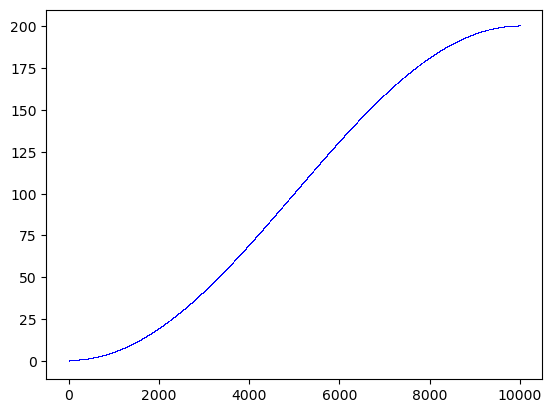

In [193]:
plt.plot(range(len(E)), E, 'b,')

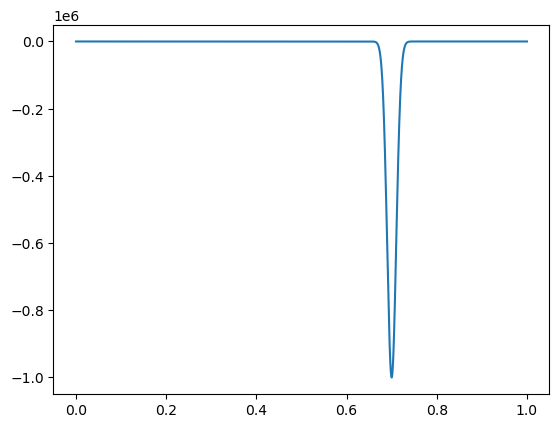

In [194]:
plt.plot(x, V(x,m,L))

(0.65, 0.75)

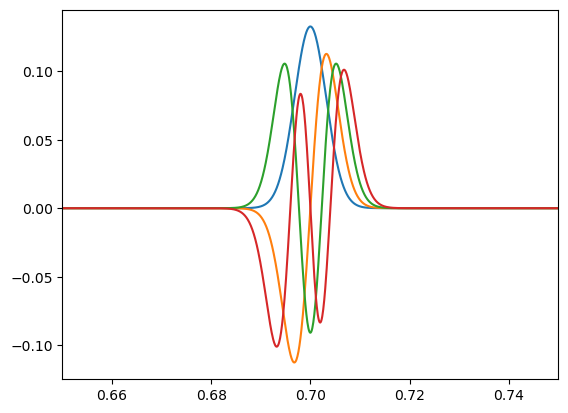

In [196]:
plt.plot(x, psi[0])
plt.plot(x, psi[1])
plt.plot(x, psi[2])
plt.plot(x, psi[3])
plt.xlim(0.65,0.75)

In [140]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [181]:

fig = plt.figure()

lines = plt.plot([])
line = lines[0]

#setup
plt.xlim(0,1)
plt.ylim(-1.2*max(psi[2]),1.2*max(psi[2]))
#plt.plot(x, V(x,m,L)/(m*L**2))

def animate(frame):
    y = psi[2]*np.real(constants.e**(-complex(0,1)*frame/(100*2*pi)))
    line.set_data((x, y))

anim = FuncAnimation(fig, animate, frames = 100, interval = 20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
